# Practical 1: Implementation of a basic document retrieval system using an inverted index in Python

We will implement a document retrieval system using an Inverted Index. This system will:


1. Index a set of documents by mapping each unique word to the documents that contain it.
2. Allow users to enter search queries with one or more terms.
3. Retrieve documents that contain all queried items efficiently.

In [ ]:
from collections import defaultdict

class InvertedIndex:
    def __init__(self, documents):
        self.documents = documents
        self.index = defaultdict(set)
        #Dictionary to store the inverted index
        self.build_index()

    def build_index(self):
        for doc_id, text in self.documents.items():
            #Convert text to lowercase and split into words
            words = set(text.lower().split())

            #Map the word to the document ID
            for word in words:
                self.index[word].add(doc_id)

    def search(self, query):
        # Convert query to lowercase and split
        query_words = query.lower().split()
        if not query_words:
            #Return empty set if query is empty
            return set()

        #Retrieve the set of documents for each query word
        result_sets = [self.index[word] for word in query_words if word in self.index]
        if not result_sets:
            return set()

        #If none of the words are found, return an empty set
        #Perform intersection to get documents containing all words
        return set.intersection(*result_sets)

#Sample Documents
documents = {
    1: "Web Content extraction involves retrieving structured data",
    2: "Search engines use document indexing for efficient retrieval",
    3: "Document retrieval is important in web mining applications",
    4: "Indexing helps in retrieving relevant documents based on query terms"
}

#Create the inverted index
index = InvertedIndex(documents)

#Example search queries
queries = ["retrieval", "document indexing", "web mining", "structured data"]

for query in queries:
    result = index.search(query)
    print(f"Query: '{query}' -> Documents: {sorted(result) if result else 'No Matching Documents'}")

Query: 'retrieval' -> Documents: [2, 3]
Query: 'document indexing' -> Documents: [2]
Query: 'web mining' -> Documents: [3]
Query: 'structured data' -> Documents: [1]


Features of Inverted Index:
1. Efficient Search - Finding relevant documents is faster using an index comapred to scanning all documents.
2. Handles large datasets - Useful for search engines and text retrieval.
3. Supports multi-word queries - Finds documents that contain all the words in a query.

# Practical 2: Implementation of Retrieval Models (Boolean Model & Vector Space Model)

In [ ]:
from collections import defaultdict
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

class BooleanRetrieval:
    def __init__(self, documents):
        """
        Initializes the inverted index for Boolean Retrieval.
        :param documents: A dictionary where keys are document IDs and values are document text.
        """
        self.documents = documents
        self.inverted_index = defaultdict(set)  #Dictionary to store the inverted index
        self.build_index()

    def build_index(self):
        """Builds the inverted index from the provided documents."""
        for doc_id, text in self.documents.items():
            words = set(text.lower().split())  #Convert text to lowercase and split into words
            for word in words:
                self.inverted_index[word].add(doc_id)  #Map word to document ID

    def boolean_search(self, query):
        """
        Performs a Boolean search with AND, OR, and NOT operations.
        :param query: A Boolean search query (e.g., "retrieval AND document").
        :return: A set of document IDs matching the query.
        """
        terms = query.lower().split()  #Convert query to lowercase and split
        result_set = set(self.documents.keys())  #Start with all documents

        operation = "AND"  #Default operation
        for term in terms:
            if term == "and":
                operation = "AND"
            elif term == "or":
                operation = "OR"
            elif term == "not":
                operation = "NOT"
            else:
                if operation == "AND":
                    result_set &= self.inverted_index.get(term, set())
                elif operation == "OR":
                    result_set |= self.inverted_index.get(term, set())
                elif operation == "NOT":
                    result_set -= self.inverted_index.get(term, set())

        return result_set

class VectorSpaceRetrieval:
    def __init__(self, documents):
        """
        Initializes the TF-IDF vectorization for document retrieval.
        :param documents: A dictionary where keys are document IDs and values are document text.
        """
        self.documents = documents
        self.vectorizer = TfidfVectorizer()
        self.doc_ids = list(documents.keys())
        self.doc_vectors = self.vectorizer.fit_transform(documents.values())  #Compute TF-IDF vectors

    def vector_search(self, query):
        """
        Performs a vector space search using cosine similarity.
        :param query: A text query.
        :return: A list of (document ID, similarity score) sorted by relevance.
        """
        query_vector = self.vectorizer.transform([query])  #Convert query to TF-IDF vector
        similarities = np.dot(self.doc_vectors, query_vector.T).toarray().flatten()  #Compute cosine similarity
        ranked_results = sorted(zip(self.doc_ids, similarities), key=lambda x: x[1], reverse=True)

        return ranked_results

#Sample documents
documents = {
    1: "Web content extraction involves retrieving structured data",
    2: "Search engines use document indexing for efficient retrieval",
    3: "Document retrieval is important in web mining applications",
    4: "Indexing helps in retrieving relevant documents based on query terms"
}

#Boolean Retrieval System
boolean_index = BooleanRetrieval(documents)
boolean_queries = ["retrieval AND document", "document OR indexing", "retrieval NOT indexing"]

print("\n=== Boolean Retrieval Results ===")
for query in boolean_queries:
    result = boolean_index.boolean_search(query)
    print(f"Query: '{query}' → Documents: {sorted(result) if result else 'No matching documents'}")

# Vector Space Retrieval System
vector_index = VectorSpaceRetrieval(documents)
vector_queries = ["document retrieval", "web mining", "structured data"]

print("\n=== Vector Space Model Results ===")
for query in vector_queries:
    result = vector_index.vector_search(query)
    print(f"Query: '{query}' → Ranked Documents: {[(doc, round(score, 4)) for doc, score in result if score > 0]}")


=== Boolean Retrieval Results ===
Query: 'retrieval AND document' → Documents: [2, 3]
Query: 'document OR indexing' → Documents: [2, 3, 4]
Query: 'retrieval NOT indexing' → Documents: [3]

=== Vector Space Model Results ===
Query: 'document retrieval' → Ranked Documents: [(3, np.float64(0.4378)), (2, np.float64(0.4256))]
Query: 'web mining' → Ranked Documents: [(3, np.float64(0.5)), (1, np.float64(0.1954))]
Query: 'structured data' → Ranked Documents: [(1, np.float64(0.566))]


# Practical 3

In [ ]:
from collections import defaultdict
import numpy as np

class InvertedIndex:
    def __init__(self, documents):
        """
        Initializes the inverted index with a given set of documents.
        :param documents: A dictionary where keys are document IDs and values are document text.
        """
        self.documents = documents
        self.index = defaultdict(set)  # Dictionary to store the inverted index
        self.vocabulary = set()  # Stores unique words for spell correction
        self.build_index()

    def build_index(self):
        """Builds the inverted index from the provided documents."""
        for doc_id, text in self.documents.items():
            words = set(text.lower().split()) # Convert text to lowercase and split into words
            self.vocabulary.update(words)  # Store words for spell correction
            for word in words:
                self.index[word].add(doc_id)  # Map the word to the document ID

    def search(self, query):
        """
        Searches for documents containing words in the query.
        :param query: A user query string containing potentially misspelled words.
        :return: A set of document IDs matching the corrected query words.
        """
        corrected_words = [self.correct_spelling(word) for word in query.lower().split()]
        print(f"Corrected Query: {' '.join(corrected_words)}")

        result_sets = [self.index[word] for word in corrected_words if word in self.index]

        if not result_sets:
            return set()  # If none of the words are found, return empty set

        return set.intersection(*result_sets)  # Find common documents for all words

    def correct_spelling(self, word):
        """
        Corrects the spelling of a given word using the Levenshtein Distance.

        :param word: The potentially misspelled word.
        :return: The closest matching word from the vocabulary.
        """
        min_distance = float('inf')
        best_match = word  # Default to original word if no close match is found

        for vocab_word in self.vocabulary:
            distance = self.levenshtein_distance(word, vocab_word)
            if distance < min_distance:
                min_distance = distance
                best_match = vocab_word  # Update best match if a closer word is found

        return best_match

    def levenshtein_distance(self, s1, s2):
        """
        Computes the Levenshtein Distance between two words.

        :param s1: First word.
        :param s2: Second word.
        :return: The edit distance between the two words.
        """
        len_s1, len_s2 = len(s1), len(s2)
        dp = np.zeros((len_s1 + 1, len_s2 + 1), dtype=int)

        for i in range(len_s1 + 1):
            for j in range(len_s2 + 1):
                if i == 0:
                    dp[i][j] = j
                elif j == 0:
                    dp[i][j] = i
                elif s1[i - 1] == s2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1]
                else:
                    dp[i][j] = 1 + min(dp[i - 1][j], # Deletion
                                        dp[i][j - 1],  # Insertion
                                        dp[i - 1][j - 1])  # Substitution

        return dp[len_s1][len_s2]

# Sample documents
documents = {
   1: "Web content extraction involves retrieving structured data",
   2: "Search engines use document indexing for efficient retrieval",
   3: "Document retrieval is important in web mining applications",
   4: "Indexing helps in retrieving relevant documents based on query terms"
}

# Create the inverted index
index = InvertedIndex(documents)

# Example search queries with misspelled words
queries = ["retrievel", "documnt indexing", "web minng", "strctured data"]

print("\n=== Spelling Correction and Document Retrieval ===")
for query in queries:
   result = index.search(query)
   print(f"Query: '{query}' → Corrected Documents: {sorted(result) if result else 'No matching documents'}")


=== Spelling Correction and Document Retrieval ===
Corrected Query: retrieval
Query: 'retrievel' → Corrected Documents: [2, 3]
Corrected Query: document indexing
Query: 'documnt indexing' → Corrected Documents: [2]
Corrected Query: web mining
Query: 'web minng' → Corrected Documents: [3]
Corrected Query: structured data
Query: 'strctured data' → Corrected Documents: [1]


# Practical 4

In [ ]:
def calculate_precision(tp, fp):
    """
    Calculates Precision: Precision = TP / (TP + FP)
    :param tp: True Positives (correctly retrieved relevant documents)
    :param fp: False Positives (incorrectly retrieved non-relevant documents)
    :return: Precision value
    """
    if tp + fp == 0:
        return 0.0  # Avoid division by zero
    return tp / (tp + fp)

def calculate_recall(tp, fn):
    """
    Calculates Recall: Recall = TP / (TP + FN)
    :param tp: True Positives (correctly retrieved relevant documents)
    :param fn: False Negatives (relevant documents not retrieved)
    :return: Recall value
    """
    if tp + fn == 0:
        return 0.0  # Avoid division by zero
    return tp / (tp + fn)

def calculate_f1_score(precision, recall):
    """
    Calculates F1-Score: F1 = 2 * (Precision * Recall) / (Precision + Recall)

    :param precision: Calculated Precision value
    :param recall: Calculated Recall value
    :return: F1-Score value
    """
    if precision + recall == 0:
        return 0.0  # Avoid division by zero
    return 2 * (precision * recall) / (precision + recall)

def evaluate_retrieval(relevant_docs, retrieved_docs):
    """
    Evaluates the retrieval performance by calculating TP, FP, and FN.
    :param relevant_docs: A set of relevant document IDs (ground truth)
    :param retrieved_docs: A set of document IDs retrieved by the IR system
    :return: Computed Precision, Recall, and F1-score
    """
    tp = len(relevant_docs & retrieved_docs)  # True Positives (Correctly retrieved relevant docs)
    fp = len(retrieved_docs - relevant_docs)  # False Positives (Retrieved but not relevant)
    fn = len(relevant_docs - retrieved_docs)  # False Negatives (Relevant but not retrieved)

    # Calculate metrics
    precision = calculate_precision(tp, fp)
    recall = calculate_recall(tp, fn)
    f1_score = calculate_f1_score(precision, recall)

    return tp, fp, fn, precision, recall, f1_score

# Example Data: Ground Truth & Retrieved Documents
relevant_documents = {1, 2, 3, 5, 7}  # Actual relevant document IDs
retrieved_documents = {1, 2, 4, 5, 6}  # Documents retrieved by the IR system

# Compute evaluation metrics
tp, fp, fn, precision, recall, f1_score = evaluate_retrieval(relevant_documents, retrieved_documents)

# Display Results
print("\n=== Evaluation Metrics for Information Retrieval ===")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")


=== Evaluation Metrics for Information Retrieval ===
True Positives (TP): 3
False Positives (FP): 2
False Negatives (FN): 2
Precision: 0.6000
Recall: 0.6000
F1-Score: 0.6000


# Practical 5

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_20newsgroups # Import 20 Newsgroups dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text to TF-IDF vectors
from sklearn.model_selection import train_test_split  # Split data into training and test sets
from sklearn.naive_bayes import MultinomialNB  # Naïve Bayes Classifier
from sklearn.svm import SVC  # Support Vector Machine Classifier
from sklearn.metrics import accuracy_score, classification_report  # Model evaluation metrics

# Load the 20 Newsgroups dataset
categories = ['alt.atheism', 'rec.motorcycles', 'comp.graphics', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')  # Remove common English stop words
X = vectorizer.fit_transform(newsgroups.data) # Transform text into TF-IDF features
y = newsgroups.target  # Get category labels

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Naïve Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Train and evaluate SVM classifier
svm_classifier = SVC(kernel='linear')  # Linear kernel for text classification
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Print evaluation results
print("\n=== Naïve Bayes Classifier Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_nb, target_names=categories))

print("\n=== Support Vector Machine (SVM) Classifier Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=categories))

# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_20newsgroups # Import 20 Newsgroups dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text to TF-IDF vectors
from sklearn.model_selection import train_test_split  # Split data into training and test sets
from sklearn.naive_bayes import MultinomialNB  # Naïve Bayes Classifier
from sklearn.svm import SVC  # Support Vector Machine Classifier
from sklearn.metrics import accuracy_score, classification_report  # Model evaluation metrics

# Load the 20 Newsgroups dataset
categories = ['alt.atheism', 'rec.motorcycles', 'comp.graphics', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')  # Remove common English stop words
X = vectorizer.fit_transform(newsgroups.data) # Transform text into TF-IDF features
y = newsgroups.target  # Get category labels

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Naïve Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Train and evaluate SVM classifier
svm_classifier = SVC(kernel='linear')  # Linear kernel for text classification
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Print evaluation results
print("\n=== Naïve Bayes Classifier Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_nb, target_names=categories))

print("\n=== Support Vector Machine (SVM) Classifier Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=categories))


=== Naïve Bayes Classifier Performance ===
Accuracy: 0.9069
Classification Report:
                  precision    recall  f1-score   support

    alt.atheism       0.97      0.84      0.90       174
rec.motorcycles       0.94      0.93      0.93       192
  comp.graphics       0.84      0.96      0.90       186
        sci.med       0.90      0.90      0.90       200

       accuracy                           0.91       752
      macro avg       0.91      0.91      0.91       752
   weighted avg       0.91      0.91      0.91       752


=== Support Vector Machine (SVM) Classifier Performance ===
Accuracy: 0.9029
Classification Report:
                  precision    recall  f1-score   support

    alt.atheism       0.95      0.84      0.89       174
rec.motorcycles       0.99      0.90      0.94       192
  comp.graphics       0.81      0.95      0.87       186
        sci.med       0.89      0.92      0.90       200

       accuracy                           0.90       752
      macr

# Practical 6: Clustering for Information Retrieval Using K-Means & Hierarchical Clustering


=== K-Means Clustering Results ===
Number of Clusters: 4
Silhouette Score: 0.0154


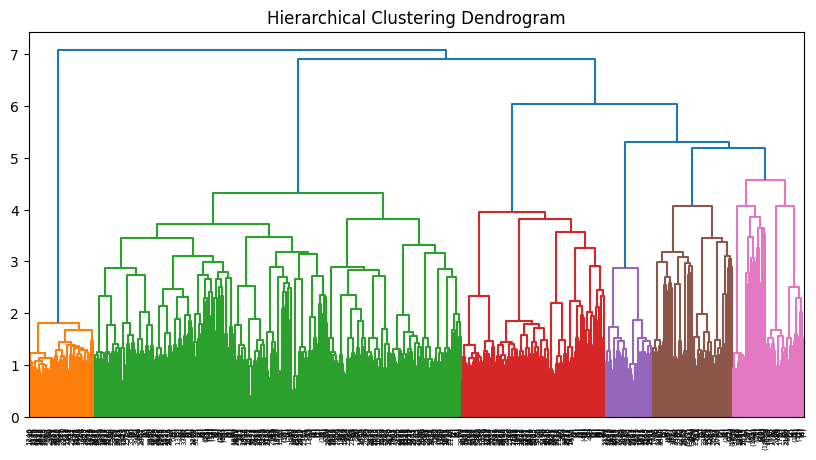


=== Hierarchical Clustering Results ===
Number of Clusters: 4


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups  # Load 20 Newsgroups dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text to TF-IDF features
from sklearn.cluster import KMeans, AgglomerativeClustering  # K-Means & Hierarchical clustering
from sklearn.metrics import silhouette_score  # Evaluate clustering performance
from scipy.cluster.hierarchy import dendrogram, linkage  # Hierarchical clustering visualization

# Load a subset of 20 Newsgroups dataset (4 categories for simplicity)
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Convert text data into numerical format using TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Limit features for efficiency
X = vectorizer.fit_transform(newsgroups.data)  # Transform text into TF-IDF vectors

# ---------------- K-MEANS CLUSTERING ----------------
# Define number of clusters (same as number of categories)
num_clusters = len(categories)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)  # Assign clusters

# Compute silhouette score to evaluate clustering performance
silhouette_avg = silhouette_score(X, kmeans_labels)

# Display K-Means results
print("\n=== K-Means Clustering Results ===")
print(f"Number of Clusters: {num_clusters}")
print(f"Silhouette Score: {silhouette_avg:.4f}")

# ---------------- HIERARCHICAL CLUSTERING ----------------
# Perform Agglomerative Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward') # Remove affinity parameter
hierarchical_labels = hierarchical.fit_predict(X.toarray())  # Convert sparse matrix to array

# Plot dendrogram for hierarchical clustering
plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendrogram")
Z = linkage(X.toarray(), method='ward')  # Compute hierarchical clustering linkage matrix
dendrogram(Z, truncate_mode="level", p=10)  # Visualize only first few levels
plt.show()

# Display Hierarchical clustering results
print("\n=== Hierarchical Clustering Results ===")
print(f"Number of Clusters: {num_clusters}")

# Practical 7: Page Ranking Algorithm

In [ ]:
import numpy as np

def initialize_pagerank(graph):
   
    num_nodes = len(graph)
    return {node: 1 / num_nodes for node in graph}  # All nodes start with equal probability

def compute_pagerank(graph, damping_factor=0.85, max_iterations=100, tolerance=1e-6):
    
    num_nodes = len(graph)
    pagerank = initialize_pagerank(graph)  # Initialize PR values
    new_pagerank = pagerank.copy()

    for _ in range(max_iterations):
        for node in graph:
            # Calculate new PR value using the PageRank formula
            new_pagerank[node] = (1 - damping_factor) / num_nodes + damping_factor * sum(
                pagerank[incoming] / len(graph[incoming]) for incoming in graph if node in graph[incoming]
            )

        # Check convergence (if the change in values is below tolerance, stop iterating)
        if all(abs(new_pagerank[node] - pagerank[node]) < tolerance for node in pagerank):
            break
        pagerank = new_pagerank.copy()  # Update PR values

    return pagerank

# ---------------- EXAMPLE DATASET (Web Graph) ----------------
# Representation of a small web graph as an adjacency list
web_graph = {
    'A': {'B', 'C'},
    'B': {'C'},
    'C': {'A'},
    'D': {'C'}
}

# Compute PageRank
pagerank_scores = compute_pagerank(web_graph)

# Display Results
print("\n=== PageRank Scores ===")
for page, score in sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"Page {page}: {score:.6f}")


=== PageRank Scores ===
Page C: 0.394149
Page A: 0.372526
Page B: 0.195824
Page D: 0.037500
